# Linear Regression

## 1. Data generation

In [91]:
import numpy as np

x_list = []
y_list = []

average = 0
for i in range(0,1000):
    data = np.random.uniform(-1.5,1.0)
    average += data
    x_list.append(data)

x_list = sorted(x_list)

for i in range(0,1000):
    epsilon = np.random.normal(loc = 0.0, scale = 0.5)
    y_list.append(3*pow(x_list[i],3) + 2*pow(x_list[i],2) - 3*x_list[i] + 1 + epsilon)
    



## 2. Data preprocessing

In [92]:
from sklearn.preprocessing import PolynomialFeatures
import random

deg1_list = []
deg2_list = []
deg3_list = []
deg4_list = []

for i in range(0,1000):
    deg1_list.append([1, x_list[i], y_list[i]])
    deg2_list.append([1, x_list[i], pow(x_list[i],2),y_list[i]])
    deg3_list.append([1, x_list[i], pow(x_list[i],2), pow(x_list[i],3), y_list[i]])
    deg4_list.append([1, x_list[i], pow(x_list[i],2), pow(x_list[i],3), pow(x_list[i],4), y_list[i]])

random.shuffle(deg1_list)
random.shuffle(deg2_list)
random.shuffle(deg3_list)
random.shuffle(deg4_list)

deg1_x_list = [row[0:-1] for row in deg1_list]
deg2_x_list = [row[0:-1] for row in deg2_list]
deg3_x_list = [row[0:-1] for row in deg3_list]
deg4_x_list = [row[0:-1] for row in deg4_list]
deg1_y_list = [row[-1] for row in deg1_list]
deg2_y_list = [row[-1] for row in deg2_list]
deg3_y_list = [row[-1] for row in deg3_list]
deg4_y_list = [row[-1] for row in deg4_list]


## 3. Model construction

In [93]:
from sklearn.linear_model import LinearRegression
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import math


regression1 = LinearRegression(fit_intercept = False)
regression2 = LinearRegression(fit_intercept = False)
regression3 = LinearRegression(fit_intercept = False)
regression4 = LinearRegression(fit_intercept = False)

regression1.fit(deg1_x_list, deg1_y_list)
regression2.fit(deg2_x_list, deg2_y_list)
regression3.fit(deg3_x_list, deg3_y_list)
regression4.fit(deg4_x_list, deg4_y_list)


LinearRegression(fit_intercept=False)

## 5. Result

the weights of degree 1 polynomial is :  [ 1.61768616 -0.70004784]
the weights of degree 2 polynomial is :  [ 1.73730472 -0.82479491 -0.26349243]
the weights of degree 3 polynomial is :  [ 1.05967756 -2.9753288   1.96161541  2.97365335]
the weights of degree 4 polynomial is :  [ 1.05360765 -2.946801    2.00652777  2.92620431 -0.04763504]
The expected value of y is :  1.798435891802785


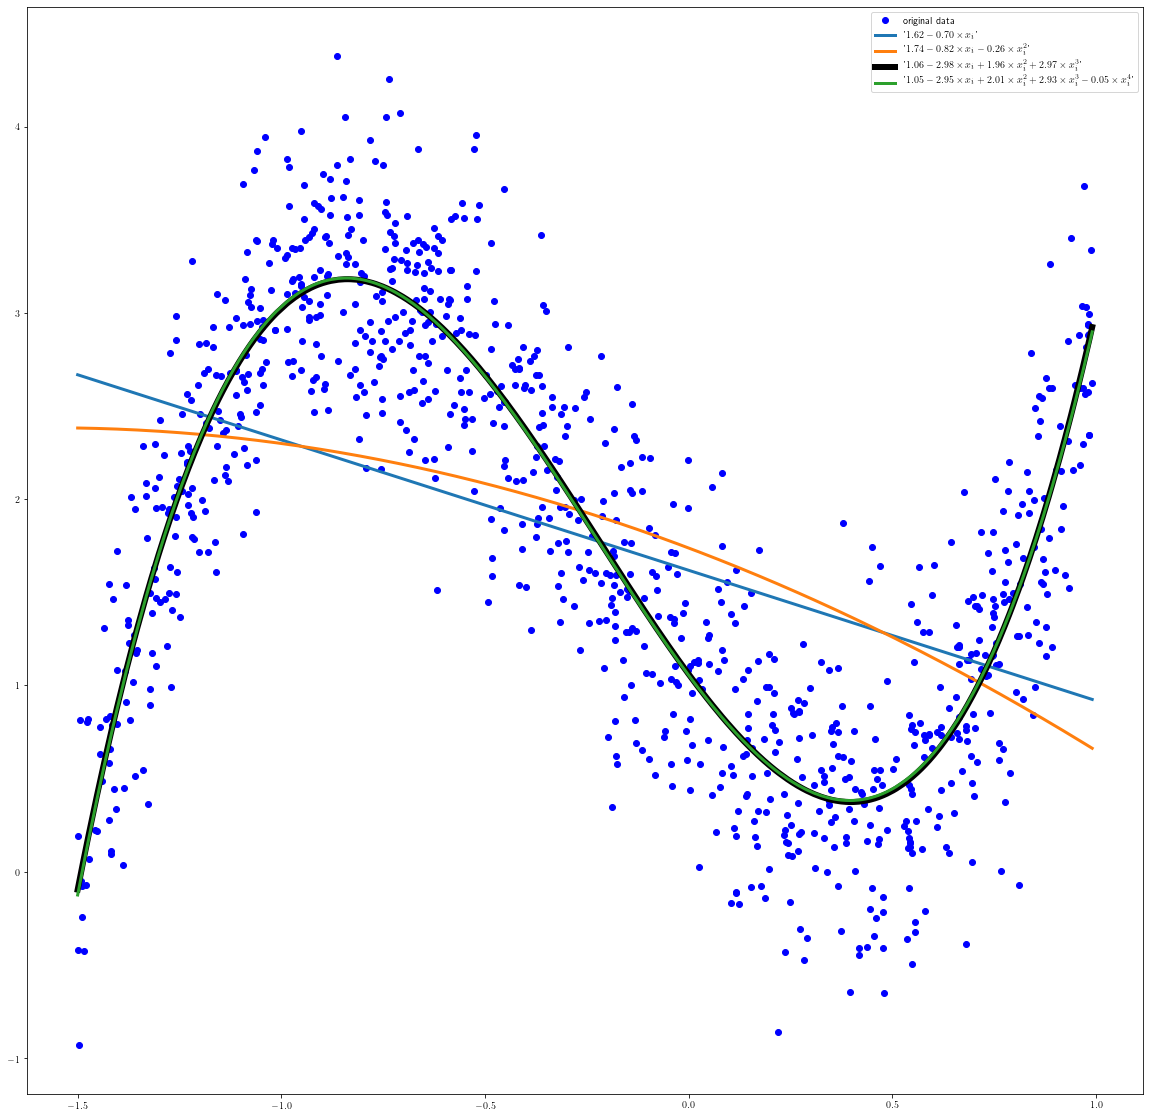

In [95]:

print("the weights of degree 1 polynomial is : ",regression1.coef_)
print("the weights of degree 2 polynomial is : ",regression2.coef_)
print("the weights of degree 3 polynomial is : ",regression3.coef_)
print("the weights of degree 4 polynomial is : ",regression4.coef_)

y_hat = 0
for y_now in y_list:
    y_hat += y_now
y_hat /= len(y_list)
print("The expected value of y is : ",y_hat)


plt.figure(figsize = (20,20))

plot_origin = plt.plot(x_list,y_list,'bo',label = 'original data')


#x_list = sorted(x_list)

regression1_y_plot = []

for i in range(len(x_list)):
    buf = 0
    for j in range(len(regression1.coef_)):
        buf += regression1.coef_[j] * math.pow(x_list[i],j)
    regression1_y_plot.append(buf)

text_linear_1 = ''
for i in range(len(regression1.coef_)):
    if i == 0:
        if regression1.coef_[i] < 0:
            text_linear_1 += "%.2f" % regression1.coef_[i] + " "
        else:
            text_linear_1 += "%.2f" % regression1.coef_[i] + " "
    else:
        if i == 1:
            if regression1.coef_[i] < 0:
                text_linear_1 += "%.2f" % regression1.coef_[i] + "\times x_{i} "
            else:
                text_linear_1 += " + " + "%.2f" % regression1.coef_[i] + "\times x_{i} "
        else:
            if regression1.coef_[i] < 0:
                text_linear_1 += "%.2f" % regression1.coef_[i] + "\times x_{i}^" + str(i) + " "
            else:
                text_linear_1 += " + " + "%.2f" % regression1.coef_[i] + "\times x_{i}^" + str(i) + " "

text_linear_1 = repr("$" + text_linear_1 + "$")

plot_regression1 = plt.plot(x_list,regression1_y_plot,label=text_linear_1,linewidth=3)



regression2_y_plot = []
for i in range(len(x_list)):
    buf = 0
    for j in range(len(regression2.coef_)):
        buf += regression2.coef_[j] * math.pow(x_list[i],j)
    regression2_y_plot.append(buf)

text_linear_2 = ''
for i in range(len(regression2.coef_)):
    if i == 0:
        if regression2.coef_[i] < 0:
            text_linear_2 += "%.2f" % regression2.coef_[i] + " "
        else:
            text_linear_2 += "%.2f" % regression2.coef_[i] + " "
    else:
        if i == 1:
            if regression2.coef_[i] < 0:
                text_linear_2 += "%.2f" % regression2.coef_[i] + "\times x_{i} "
            else:
                text_linear_2 += " + " + "%.2f" % regression2.coef_[i] + "\times x_{i} "
        else:
            if regression2.coef_[i] < 0:
                text_linear_2 += "%.2f" % regression2.coef_[i] + "\times x_{i}^" + str(i) + " "
            else:
                text_linear_2 += " + " + "%.2f" % regression2.coef_[i] + "\times x_{i}^" + str(i) + " "

text_linear_2 = repr("$" + text_linear_2 + "$")
plot_regression2 = plt.plot(x_list,regression2_y_plot,label=text_linear_2,linewidth=3)



regression3_y_plot = []
for i in range(len(x_list)):
    buf = 0
    for j in range(len(regression3.coef_)):
        buf += regression3.coef_[j] * math.pow(x_list[i],j)
    regression3_y_plot.append(buf)

text_linear_3 = ''
for i in range(len(regression3.coef_)):
    if i == 0:
        if regression3.coef_[i] < 0:
            text_linear_3 += "%.2f" % regression3.coef_[i] + " "
        else:
            text_linear_3 += "%.2f" % regression3.coef_[i] + " "
    else:
        if i == 1:
            if regression3.coef_[i] < 0:
                text_linear_3 += "%.2f" % regression3.coef_[i] + "\times x_{i} "
            else:
                text_linear_3 += " + " + "%.2f" % regression3.coef_[i] + "\times x_{i} "
        else:
            if regression3.coef_[i] < 0:
                text_linear_3 += "%.2f" % regression3.coef_[i] + "\times x_{i}^" + str(i) + " "
            else:
                text_linear_3 += " + " + "%.2f" % regression3.coef_[i] + "\times x_{i}^" + str(i) + " "

text_linear_3 = repr("$" + text_linear_3 + "$")
plot_regression3 = plt.plot(x_list,regression3_y_plot,label=text_linear_3,color="black",linewidth=6)



regression4_y_plot = []
for i in range(len(x_list)):
    buf = 0
    for j in range(len(regression4.coef_)):
        buf += regression4.coef_[j] * math.pow(x_list[i],j)
    regression4_y_plot.append(buf)

text_linear_4 = ''
for i in range(len(regression4.coef_)):
    if i == 0:
        if regression4.coef_[i] < 0:
            text_linear_4 += "%.2f" % regression4.coef_[i] + " "
        else:
            text_linear_4 += "%.2f" % regression4.coef_[i] + " "
    else:
        if i == 1:
            if regression4.coef_[i] < 0:
                text_linear_4 += "%.2f" % regression4.coef_[i] + "\times x_{i} "
            else:
                text_linear_4 += " + " + "%.2f" % regression4.coef_[i] + "\times x_{i} "
        else:
            if regression4.coef_[i] < 0:
                text_linear_4 += "%.2f" % regression4.coef_[i] + "\times x_{i}^" + str(i) + " "
            else:
                text_linear_4 += " + " + "%.2f" % regression4.coef_[i] + "\times x_{i}^" + str(i) + " "

text_linear_4 = repr("$" + text_linear_4 + "$")
plot_regression4 = plt.plot(x_list,regression4_y_plot,label=text_linear_4,linewidth=3)



plt.legend()
#plt.rc('text',usetex = True)
plt.show()



# Logistic Regression


## 1. Data generation & 2. Data preprocessing

In [97]:
x_list = []
y_list = np.random.choice(a=[0,1], size=1000, replace=True, p=None)

for i in range(len(y_list)):
    x1 = np.random.multivariate_normal(mean = [y_list[i],y_list[i]], cov = [[0.1,0],[0,0.1]])
    x_list.append(x1)



## 3. Model construction

In [98]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

lg = LogisticRegression()
lg.fit(x_list,y_list)


LogisticRegression()

## 5. Result

the accuracy of logistic regression is :  0.987


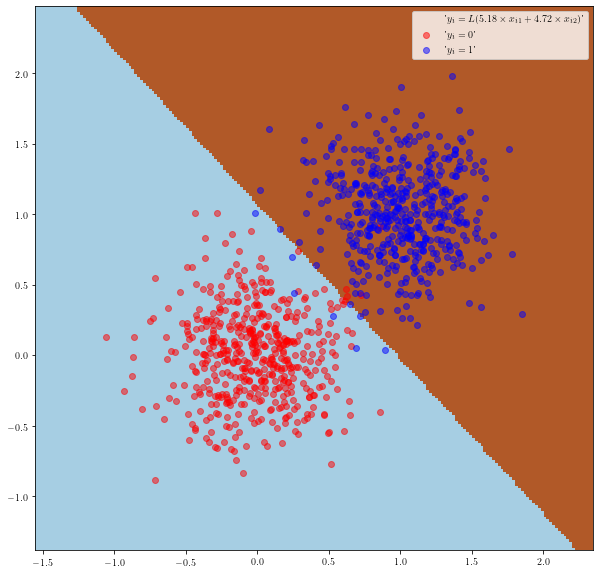

In [103]:
print("the accuracy of logistic regression is : ",metrics.accuracy_score(y_list,lg.predict(x_list)))


y0_list_x = []
y0_list_y = []

y1_list_x = []
y1_list_y = []


for i in range(len(y_list)):
    if y_list[i] == 0:
        y0_list_x.append(x_list[i][0])
        y0_list_y.append(x_list[i][1])
    else:
        y1_list_x.append(x_list[i][0])
        y1_list_y.append(x_list[i][1])

plt.figure(figsize=(10,10))

x_list = np.array(x_list)
y_list = np.array(y_list)

x_min = x_list[:, 0].min() - .5
x_max = x_list[:, 0].max() + .5
y_min = x_list[:, 1].min() - .5
y_max = x_list[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

coef_x1 = 0
if lg.coef_[0][1] > 0:
    coef_x1 = " + " + "%.2f" % lg.coef_[0][1]
else:
    coef_x1 = "%.2f" % lg.coef_[0][1]

text_1 = "$y_{i} = L(" + "%.2f" % lg.coef_[0][0] + " \times x_{i1} " + coef_x1 + " \times x_{i2}" + ")$"
text_1 = repr(text_1)

text1 = "$y_{i} = 0$"
text2 = "$y_{i} = 1$"
plt.plot([],[],'',label = text_1, color = "white", alpha = 0.001)
plt.plot(y0_list_x, y0_list_y, 'ro', alpha = 0.5, label = repr(text1))
plt.plot(y1_list_x, y1_list_y, 'bo', alpha = 0.5, label = repr(text2))

plt.legend()

